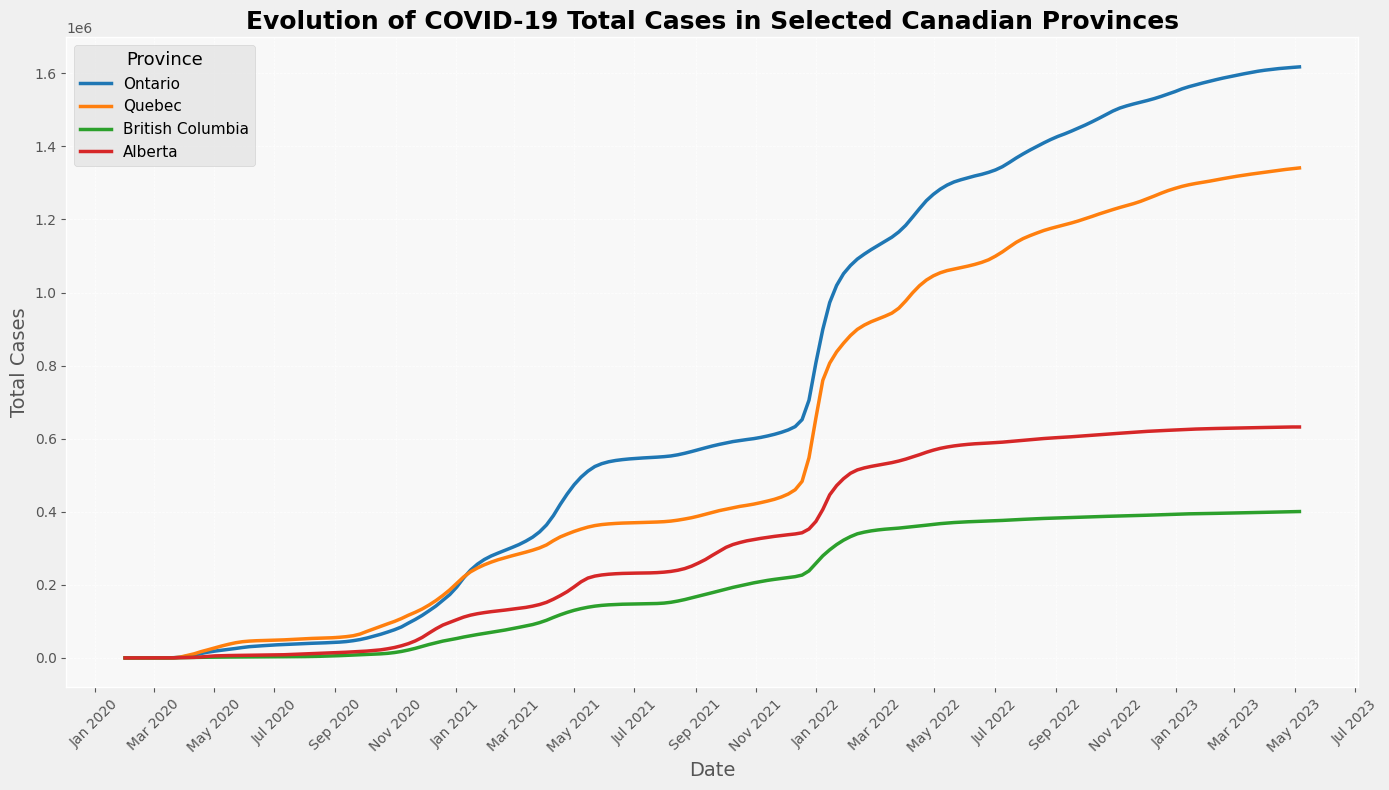

In [ ]:
# ================================================================
# COVID-19 Fatality Rate Analysis
# Prepared by: Darrah Borinaga
# Date: March 20, 2025
# Purpose: To test if provincial COVID-19 death rates follow a normal distribution.
# ================================================================

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load Dataset
data_file = r'C:\Users\darbo\OneDrive\Desktop\Dataset_TMU\covid19-dataset (1).csv'

# Dataset
df = pd.read_csv(data_file)

# Date to datetime
df['date'] = pd.to_datetime(df['date'])

# Sort by province and date
df_sorted = df.sort_values(by=['prname', 'date'])

# Select key provinces for analysis
selected_provinces = ['Ontario', 'Quebec', 'British Columbia', 'Alberta']
df_filtered = df_sorted[df_sorted['prname'].isin(selected_provinces)]

# Pivot the table to get totalcases per date per province
pivot_df = df_filtered.pivot(index='date', columns='prname', values='totalcases')

# Custom colors and visual style
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
plt.style.use('ggplot')

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
for idx, province in enumerate(selected_provinces):
    ax.plot(pivot_df.index, pivot_df[province], label=province, linewidth=2.5, color=colors[idx])

# X-axis formatting
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Labels and title
ax.set_title("Evolution of COVID-19 Total Cases in Selected Canadian Provinces", fontsize=18, fontweight='bold')
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Total Cases", fontsize=14)

# Grid and background
ax.set_facecolor('#f8f8f8')
fig.patch.set_facecolor('#f0f0f0')
ax.grid(True, linestyle='--', linewidth=0.5)

# Legend
legend = ax.legend(title="Province", title_fontsize='13', fontsize='11', loc='upper left', frameon=True)
legend.get_frame().set_edgecolor('#cccccc')
legend.get_frame().set_linewidth(0.5)

# Rotate date labels
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
